In [1]:
import json
from SongShu import SongShu
import re
import pandas as pd
import altair

altair.renderers.enable("notebook")
altair.data_transformers.enable('json')

# SongShu -- Geo Viz 

In [54]:
with open("SongZhouJun.json", "r", encoding="utf-8") as file:
    jun = json.load(file)
    
jun[:5]

[[1, '揚州', '丹陽'],
 [1, '揚州', '會稽'],
 [1, '揚州', '吳郡'],
 [1, '揚州', '吳興'],
 [1, '揚州', '淮南']]

## Loading Data

In [4]:
Songshu = SongShu(date='2018-8-14', creator='Z')
Songshu.load_htmls()
Songshu.extract_paths()

[Info] Stop at loading data/ShongShu_0851.html.
[Info] Total length of the data is 851.


In [13]:
# get all pages for 列傳
flat_bodies = []

for path,body in zip(Songshu.paths, Songshu.flat_bodies):
    if re.search(r"\／(列傳)", path) != None:
        flat_bodies.append(body)

In [16]:
SongshuLie = SongShu(date='2018-8-14', creator='Z')
SongshuLie.flat_bodies = flat_bodies

## Writing the HTMLs to Files with HTML Cutoff

In [22]:
SongshuLie.bookname = "SongShuLie"
SongshuLie.write_htmls(html_cutoff=True)

In [23]:
# load the files again
SongshuLie = SongShu(date='2018-8-14', creator='Z')
SongshuLie.bookname = "SongShuLie"
SongshuLie.load_htmls()
SongshuLie.extract_paths()

[Info] Stop at loading data/SongShuLie_0274.html.
[Info] Total length of the data is 274.


In [26]:
Lie_list = [str(body) for body in SongshuLie.flat_bodies]
Lie_str = "".join(Lie_list)

## Counting the Frequency of Zhou

In [38]:
zhou_count_list = []

for zhou in set([j[1] for j in jun]):
    zhou_count_list.append((zhou, Lie_str.count(zhou)))
    
zhou_count_list = sorted(zhou_count_list, key=lambda x: x[1], reverse=True)
zhou_count_list

[('豫州', 207),
 ('徐州', 194),
 ('荊州', 187),
 ('揚州', 147),
 ('江州', 128),
 ('雍州', 125),
 ('兗州', 124),
 ('青州', 121),
 ('廣州', 109),
 ('郢州', 81),
 ('湘州', 77),
 ('司州', 73),
 ('益州', 64),
 ('南兗州', 63),
 ('梁州', 55),
 ('南徐州', 51),
 ('冀州', 47),
 ('秦州', 44),
 ('南豫州', 42),
 ('交州', 35),
 ('寧州', 7),
 ('越州', 5)]

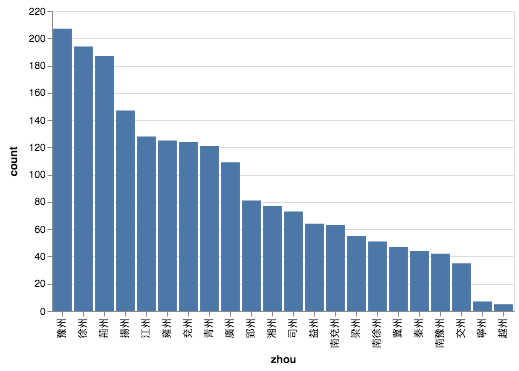

In [47]:
data = pd.DataFrame(zhou_count_list, columns=["zhou", "count"])

altair.Chart(data).mark_bar().encode(
    x=altair.X("zhou", sort=altair.SortField("count")),
    y="count",
    tooltip=["zhou", "count"]
    
    
#y=alt.Y('char', sort=alt.SortField(field="freq", op="sum", order="descending")), 
    
)

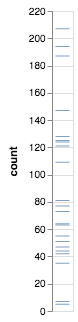

In [49]:
altair.Chart(data).mark_tick().encode(
#x=altair.X("zhou", sort=altair.SortField("count")),
    y="count",
    tooltip=["zhou", "count"]
    
    
#y=alt.Y('char', sort=alt.SortField(field="freq", op="sum", order="descending")), 
    
)

## Counting the Frequency of Jun

In [57]:
jun_count_list = []

for com in set([j[2] for j in jun]):
    jun_count_list.append((com, Lie_str.count(com)))
    
jun_count_list = sorted(jun_count_list, key=lambda x: x[1], reverse=True)
jun_count_list[:5]

[('彭城', 242), ('江夏', 172), ('會稽', 165), ('琅邪', 119), ('竟陵', 116)]

## Biography

In [62]:
len(zhou_count_each_bio_list)

274

In [93]:
def count_zhou(zhou):
    
    zhou_count_each_bio_list_Yu = []

    for i,(body,path) in enumerate(zip(SongshuLie.flat_bodies, SongshuLie.paths)):
        zhou_count_each_bio_list_Yu.append((i, path, str(body).count(zhou)))
        
    return zhou_count_each_bio_list_Yu
    
every_zhou_count_each_bio_list = [(count_zhou(zhou), zhou) for zhou in set(j[1] for j in jun)]

In [97]:
def make_dataframe(zhou_count_each_bio_list, name):
    data = pd.DataFrame(zhou_count_each_bio_list, columns=["index", "path", "count"])
    data["category"] = name
    return  data

data = pd.concat([
    make_dataframe(zhou_count_each_bio_list[0], zhou_count_each_bio_list[1])
    for zhou_count_each_bio_list in every_zhou_count_each_bio_list
])

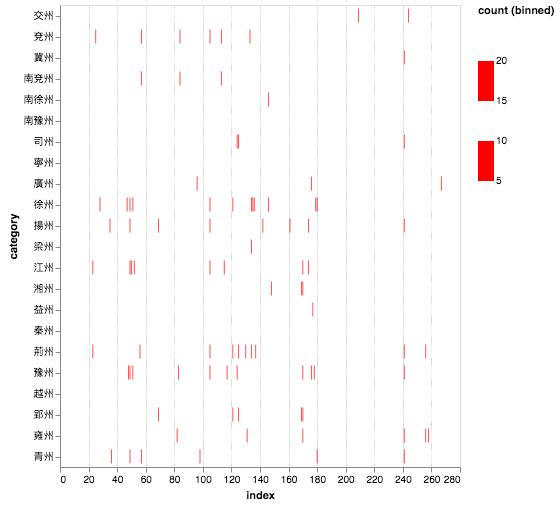

In [112]:
altair.Chart(data).mark_tick().encode(
    y="category",
    x="index",
    color=altair.Color("count", scale=altair.Scale(range=["white", "red"]), bin=True),
    tooltip=["path", "count"]    
).interactive()